## Kütüphaneler

In [ ]:
!pip install mlxtend

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from mlxtend.plotting import plot_decision_regions

In [ ]:
X, y = make_classification(
    n_samples=1000, n_features = 2,
    flip_y = 0.2, n_informative = 2,
    n_redundant = 0, random_state = 42
)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[:10]

array([[-0.66522715, -0.16128878],
       [-0.2593205 ,  0.28708903],
       [ 0.43503308,  0.58365072],
       [ 2.51562557, -1.22889346],
       [-0.89223281, -0.81822244],
       [-0.83675879, -1.12695239],
       [ 2.10565126, -1.07418501],
       [ 0.7022226 , -0.75853131],
       [-0.97718612, -0.47677322],
       [ 0.72091633, -1.66995866]])

<Axes: >

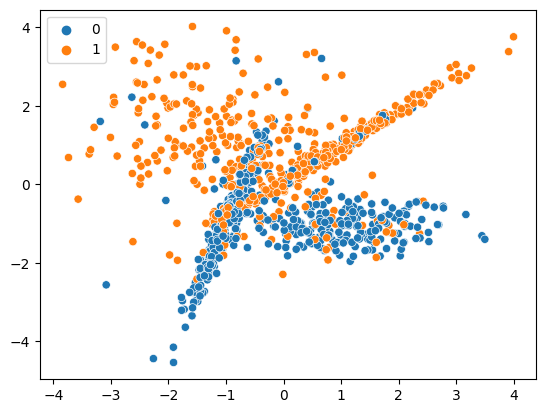

In [ ]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)

In [ ]:
max_depth = None # None olursa, overfit olur.

lr_model = LogisticRegression() # lineer model

# lineer olmayan model
dt_model = DecisionTreeClassifier(max_depth=max_depth)

In [ ]:
lr_model.fit(X, y)
dt_model.fit(X, y)

DecisionTreeClassifier()

Text(0.5, 1.0, 'DT Model // max_depth: None')

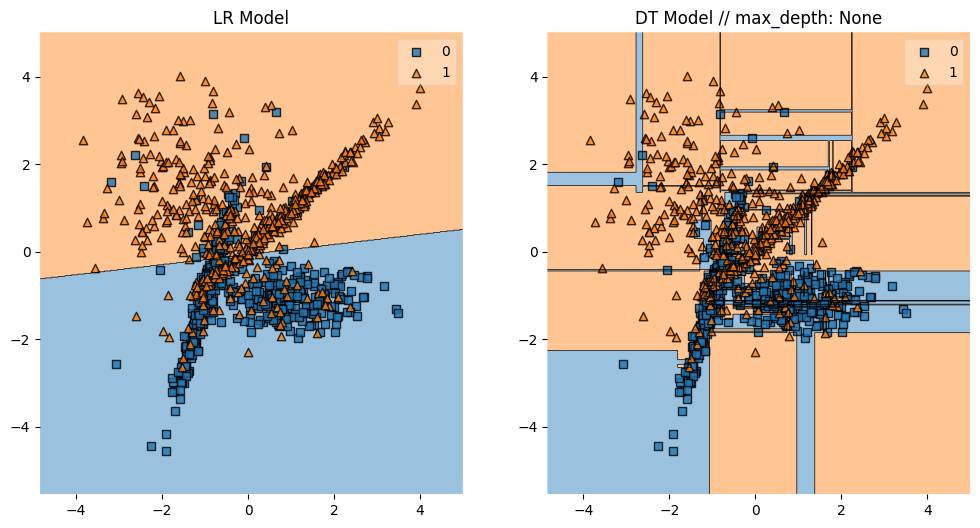

In [ ]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(X, y, lr_model)
plt.title("LR Model")

plt.subplot(1, 2, 2)
plot_decision_regions(X, y, dt_model)
plt.title(f"DT Model // max_depth: {max_depth}")

## Gradient Boosting Mantığı

In [ ]:
X = np.linspace(0, 10, 10)
y = 2 * X + 1 + np.random.randn(10)

--> Sınıflandırma

  --> 50 tane kedi resmi
  --> 50 tane köpek resmi
  --> Öğrenemeyen Model Senaryosu: %50 başarı olur (yaklaşık)

--> Regresyon

  --> Karşılık gelen y değerleri, sürekli değerler.
  --> y değerlerinin ortalamasını alalım.

In [ ]:
y.mean()

10.74319241968443

In [ ]:
y

array([ 1.64988537,  2.36988225,  6.06955659,  6.64235574, 10.38408847,
       12.08305717, 14.11495678, 15.47050435, 19.23997053, 19.40766694])

In [ ]:
10.74 - 1.649

9.091000000000001

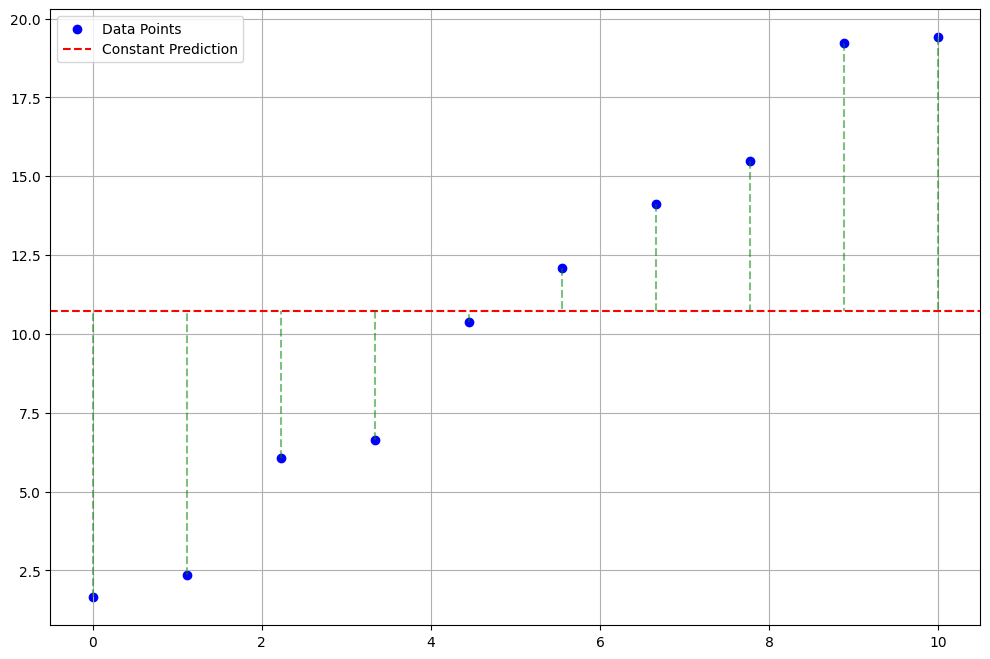

In [ ]:
# Residual

plt.figure(figsize = (12, 8))
plt.scatter(X, y, color = "blue", label = "Data Points")
plt.axhline(y.mean(), color = "red", label = "Constant Prediction",
            linestyle = "--")

for x_i, y_i in zip(X, y):
    plt.plot([x_i, x_i], [y_i, y.mean()], alpha = 0.5, linestyle = "--", color = "green")

plt.legend()
plt.grid(True)
plt.show()

### Weak Learner Yaklaşımı ve GB Temel Mantığı

--> Weak Learning bir eğitim stratejisidir.

--> Gradient Boosting'in temel mantığı, zayıf ağaçlar (weak learner) üretip bu ağaçların hatalarını başka ağaçlar ile kapatmaya çalışmaktır. Bu nedenden ötürü bu yaklaşım, `ensemble` model olarak nitelendirilir.

--> Ağaçlar sıra ile oluşturulup, bir sonraki gelen ağaç öncekinin bilemediği noktalara bakıp daha iyi tahmin yapmaya çalışır.

--> Ardışık gelen ağaçlar, birbirlerinin bilemediği noktalara odaklanır. RandomForesttan ayrılan en önemli özellik budur.

In [ ]:
X, y = make_regression(n_samples = 1000, n_features = 1, random_state = 42, noise = 20)

In [ ]:
X.shape

(1000, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    train_size = 0.8)

## Modellerin Oluşturulması

In [ ]:
def fit_simple_gbr(X, y, learning_rate, max_depth, n_estimators):

    mean_target = y.mean()
    boosted_predictions = mean_target
    trees = []

    for _ in range(n_estimators):
        residuals = y - boosted_predictions
        dt_model = DecisionTreeRegressor(max_depth = max_depth,
                                          random_state = 42)
        dt_model.fit(X, residuals)
        current_preds = dt_model.predict(X)
        boosted_predictions += current_preds * learning_rate
        trees.append(dt_model)

    return mean_target, trees

In [ ]:
def predict_simple_gbr(X, mean_target, trees, learning_rate):

    boosted_predictions = mean_target
    for tree in trees:
        boosted_predictions += tree.predict(X) * learning_rate
    return boosted_predictions

In [ ]:
gb_model_sklearn = GradientBoostingRegressor(n_estimators = 100,
                                             learning_rate = 0.1,
                                             max_depth = 1,
                                             random_state = 42)

rf_model_sklearn = RandomForestRegressor(n_estimators = 100,
                                        max_depth = 2,
                                        random_state = 42)

In [ ]:
gb_model_sklearn.fit(X_train, y_train)
rf_model_sklearn.fit(X_train, y_train)

mean_target, trees = fit_simple_gbr(X = X_train,
                                    y= y_train,
                                    learning_rate = 0.1,
                                    max_depth = 1,
                                    n_estimators = 100)

In [ ]:
gb_sklearn_preds = gb_model_sklearn.predict(X_test)
rf_sklearn_preds = rf_model_sklearn.predict(X_test)

simple_gb_preds = predict_simple_gbr(X_test, mean_target, trees, learning_rate=0.1)

## Sonuçların Karşılaştırılması

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
mse(y_test, gb_sklearn_preds)

436.8704665296708

In [ ]:
mse(y_test, simple_gb_preds)

436.8704665296708

In [ ]:
mse(y_test, rf_sklearn_preds)

433.3149778175505